# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set api key to weather key
api_key = weather_api_key

#establish units to imperial
units = "imperial"

#base url from api.openweathermap.org
baseURL = "http://api.openweathermap.org/data/2.5/weather?"

#create combination url
queryURL = baseURL + "appid=" + api_key + "&units=" + units + "&q="
#print(queryURL)

In [4]:
#create slate of geographical and time related lists and set (2) counters to initial values
MasterCount = 0
SetCount = 1
CityNames = []
Wind = []
Clouds = []
Country = []
MaxTemp = []
Long = []
Lat = []
Date = []
Humidity = []


In [5]:
#use iterrows to loop through API calls
for city in cities:
    try:
        #use get to request and convert to JSON
        response = requests.get(queryURL + city).json()

        #set date
        Date.append(response["dt"])

        #load geographic information into list created above
        Lat.append(response["coord"]["lat"])
        Long.append(response["coord"]["lon"])
        Country.append(response["sys"]["country"])

        #load atmospheric information into list created above
        MaxTemp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Clouds.append(response["clouds"]["all"])
        Wind.append(response["wind"]["speed"])

        #create loop for managing sets
        if MasterCount>48:
            MasterCount = 1
            SetCount = SetCount + 1
            CityNames.append(city)
        else:
            MasterCount = MasterCount + 1
            CityNames.append(city)
        
        #print "processed record with the {city number} and {city name}"
        print(f"processed record {MasterCount} of set {SetCount} | {city}")

    except Exception:

        #print "skipping record. city missing in data set."
        print("skipping record. city missing in data set.")



ping record. city missing in data set.
processed record 22 of set 3 | praia da vitoria
processed record 23 of set 3 | avarua
processed record 24 of set 3 | san cristobal
processed record 25 of set 3 | geraldton
processed record 26 of set 3 | ishigaki
processed record 27 of set 3 | kampene
skipping record. city missing in data set.
processed record 28 of set 3 | cherskiy
processed record 29 of set 3 | senador guiomard
processed record 30 of set 3 | owase
processed record 31 of set 3 | cidreira
processed record 32 of set 3 | nan
processed record 33 of set 3 | usinsk
processed record 34 of set 3 | podor
processed record 35 of set 3 | lavrentiya
processed record 36 of set 3 | tasiilaq
processed record 37 of set 3 | shenjiamen
processed record 38 of set 3 | le port
processed record 39 of set 3 | bermejo
processed record 40 of set 3 | aklavik
processed record 41 of set 3 | tiksi
processed record 42 of set 3 | lebu
processed record 43 of set 3 | hare bay
processed record 44 of set 3 | severo-

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#establish a dictionary to contain data from above
WeatherData = {"City":CityNames,
               "Country":Country,
               "Date":Date,
               "Latitude":Lat,
               "Longitude":Long,
               "Maximum Temperature":MaxTemp,
               "Wind Speed":Wind,
               "Humidity":Humidity,
               "Cloudiness":Clouds,}

#convert into dataframe
WeatherData_df = pd.DataFrame(WeatherData)
WeatherData_df.head()



,City,Country,Date,Latitude,Longitude,Maximum Temperature,Wind Speed,Humidity,Cloudiness
0,port elizabeth,ZA,1605238282,-33.92,25.57,62.60,9.17,93,0
1,mahebourg,MU,1605238282,-20.41,57.70,73.40,3.36,88,40
2,sao paulo de olivenca,BR,1605238283,-3.38,-68.87,73.53,3.00,98,94
3,ribeira grande,PT,1605238283,38.52,-28.70,63.93,5.75,84,40
4,airai,TL,1605238283,-8.93,125.41,82.94,4.25,37,87


In [7]:
#export to csv file
WeatherData_df.to_csv("WeatherData.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.
WeatherDataClean = WeatherData_df[WeatherData_df['Humidity']>99.9]
WeatherDataClean


,City,Country,Date,Latitude,Longitude,Maximum Temperature,Wind Speed,Humidity,Cloudiness
84,carahue,CL,1605238301,-38.70,-73.17,50.0,2.24,100,0
113,pag,HR,1605238307,44.45,15.06,46.4,1.12,100,40
123,ishigaki,JP,1605238309,24.34,124.16,73.4,21.92,100,75
163,smithers,CA,1605238140,54.78,-127.17,30.2,1.81,100,90
170,bang saphan,TH,1605238319,11.21,99.51,81.0,3.36,100,90
317,vetlanda,SE,1605238350,57.43,15.08,42.8,3.36,100,100
337,alexander city,US,1605238125,32.94,-85.95,57.2,3.36,100,1
345,imbituba,BR,1605238210,-28.24,-48.67,71.6,3.76,100,75
361,faya,SA,1605238359,18.39,42.45,57.2,1.30,100,20
399,buraydah,SA,1605238367,26.33,43.98,66.2,16.11,100,40


In [ ]:
#no weather data with humidity > 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

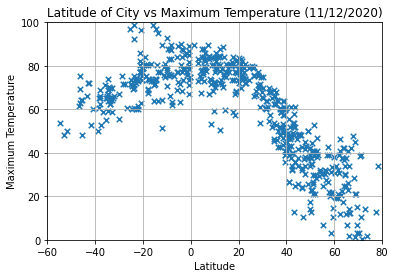

This plot shows that temperature has a negative relationship with the absolute value of the latitude.


<Figure size 432x288 with 0 Axes>

In [14]:
#draw scatter diagram with dataframe information
plt.scatter(WeatherData_df["Latitude"], WeatherData_df["Maximum Temperature"], marker='x',s=30, edgecolors= "black")

#label axises and insert title
today = time.strftime("%m/%d/%Y")
plt.title(f"Latitude of City vs Maximum Temperature ({today})")
plt.ylabel("Maximum Temperature")
plt.xlabel("Latitude")

#format plot
plt.grid()
plt.ylim(0,100)
plt.xlim(-60, 80)

#display plot and save to png
plt.show()
plt.savefig("City Lat vs Max Temp.png")
print("This plot shows that temperature has a negative relationship with the absolute value of the latitude.")

## Latitude vs. Humidity Plot

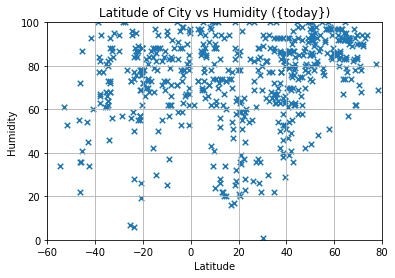

This plot shows that humidity has no relationship with the absolute value of the latitude.


<Figure size 432x288 with 0 Axes>

In [15]:
#draw scatter diagram with dataframe information
plt.scatter(WeatherData_df["Latitude"], WeatherData_df["Humidity"], marker='x',s=30, edgecolors= "black")

#label axises and insert title
today = time.strftime("%m/%d/%Y")
plt.title("Latitude of City vs Humidity ({today})")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

#format plot
plt.grid()
plt.ylim(0,100)
plt.xlim(-60, 80)

#display plot and save to png
plt.show()
plt.savefig("City Lat vs Humidity.png")
print("This plot shows that humidity has no relationship with the absolute value of the latitude.")

## Latitude vs. Cloudiness Plot

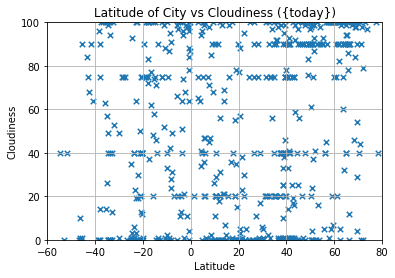

This plot shows that cloudiness has no relationship with the absolute value of the latitude.


<Figure size 432x288 with 0 Axes>

In [16]:
#draw scatter diagram with dataframe information
plt.scatter(WeatherData_df["Latitude"], WeatherData_df["Cloudiness"], marker='x',s=30, edgecolors= "black")

#label axises and insert title
today = time.strftime("%m/%d/%Y")
plt.title("Latitude of City vs Cloudiness ({today})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

#format plot
plt.grid()
plt.ylim(0,100)
plt.xlim(-60, 80)

#display plot and save to png
plt.show()
plt.savefig("City Lat vs Cloudiness.png")
print("This plot shows that cloudiness has no relationship with the absolute value of the latitude.")

## Latitude vs. Wind Speed Plot

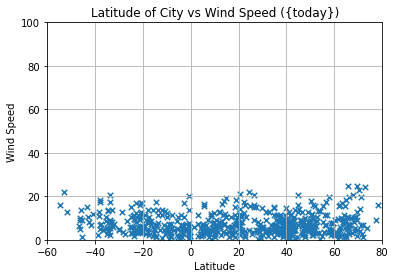

This plot shows that wind speed has no relationship with the absolute value of the latitude.


<Figure size 432x288 with 0 Axes>

In [17]:
#draw scatter diagram with dataframe information
plt.scatter(WeatherData_df["Latitude"], WeatherData_df["Wind Speed"], marker='x',s=30, edgecolors= "black")

#label axises and insert title
today = time.strftime("%m/%d/%Y")
plt.title("Latitude of City vs Wind Speed ({today})")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

#format plot
plt.grid()
plt.ylim(0,100)
plt.xlim(-60, 80)

#display plot and save to png
plt.show()
plt.savefig("City Lat vs Wind Speed.png")
print("This plot shows that wind speed has no relationship with the absolute value of the latitude.")

## Linear Regression

In [18]:
#create dataframe for northern hemi data
WeatherDataNorth_df = WeatherData_df.loc[pd.to_numeric(WeatherData_df["Latitude"]).astype(float) > 0, :]

#create dataframe for southern hemi data
WeatherDataSouth_df = WeatherData_df.loc[pd.to_numeric(WeatherData_df["Latitude"]).astype(float) < 0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.13x + 93.19
The r-squared is: -0.8856147797863866
The regression displays a negative correlation.


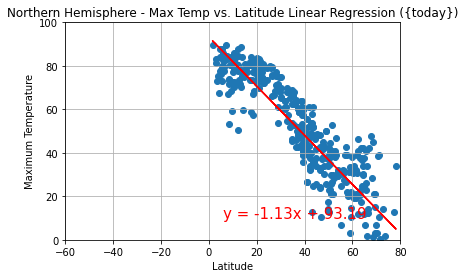

<Figure size 432x288 with 0 Axes>

In [19]:
#set x values to north latitudes
x_values = pd.to_numeric(WeatherDataNorth_df['Latitude']).astype(float)

#set y values to maximum temperatures
y_values = pd.to_numeric(WeatherDataNorth_df['Maximum Temperature']).astype(float)

#set up linear regression model function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
LinValues = x_values * slope + intercept
LinEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {LinEquation}")
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")

#create scatter plot with above data
plt.scatter(x_values,y_values)
plt.plot(x_values,LinValues,"r-")
plt.annotate(LinEquation,(6,10),fontsize=15,color="red")

#label axis and insert Title
today = time.strftime("%m/%d/%Y")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({today})')

#format plot
plt.grid()
plt.ylim(0,100)
plt.xlim(-60, 80)


#display plot and save to png
plt.show()
plt.savefig("Northern Hemisphere vs Maximum Temperature.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.44x + 82.22
The r-squared is: 0.5687054771688905
The regression displays a positive correlation.


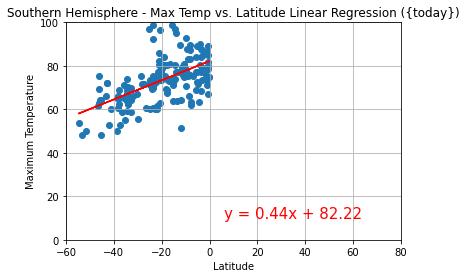

<Figure size 432x288 with 0 Axes>

In [20]:
#set x values to south latitudes
x_values = pd.to_numeric(WeatherDataSouth_df['Latitude']).astype(float)

#set y values to maximum temperatures
y_values = pd.to_numeric(WeatherDataSouth_df['Maximum Temperature']).astype(float)

#set up linear regression model function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
LinValues = x_values * slope + intercept
LinEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {LinEquation}")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")

#create scatter plot with above data
plt.scatter(x_values,y_values)
plt.plot(x_values,LinValues,"r-")
plt.annotate(LinEquation,(6,10),fontsize=15,color="red")

#label axis and insert Title
today = time.strftime("%m/%d/%Y")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({today})')

#format plot
plt.grid()
plt.ylim(0,100)
plt.xlim(-60, 80)


#display plot and save to png
plt.show()
plt.savefig("Southern Hemisphere vs Maximum Temperature.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.35x + 61.44
The r-squared is: 0.3400403606605733
The regression does not display any correlation between humidity and latitude.


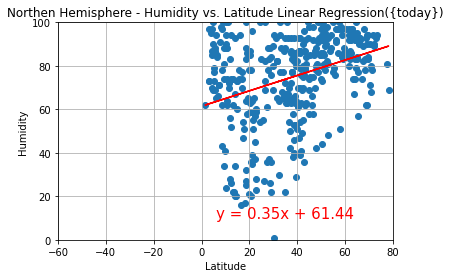

<Figure size 432x288 with 0 Axes>

In [21]:
#set x values to south latitudes
x_values = pd.to_numeric(WeatherDataNorth_df['Latitude']).astype(float)

#set y values to maximum temperatures
y_values = pd.to_numeric(WeatherDataNorth_df['Humidity']).astype(float)

#set up linear regression model function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
LinValues = x_values * slope + intercept
LinEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {LinEquation}")
print(f"The r-squared is: {rvalue}")
print("The regression does not display any correlation between humidity and latitude.")

#create scatter plot with above data
plt.scatter(x_values,y_values)
plt.plot(x_values,LinValues,"r-")
plt.annotate(LinEquation,(6,10),fontsize=15,color="red")

#label axis and insert Title
today = time.strftime("%m/%d/%Y")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northen Hemisphere - Humidity vs. Latitude Linear Regression({today})')

#format plot
plt.grid()
plt.ylim(0,100)
plt.xlim(-60, 80)


#display plot and save to png
plt.show()
plt.savefig("Northern Hemisphere vs Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.33x + 79.25
The r-squared is: 0.2386302337955789
The regression does not display any correlation between humidity and latitude.


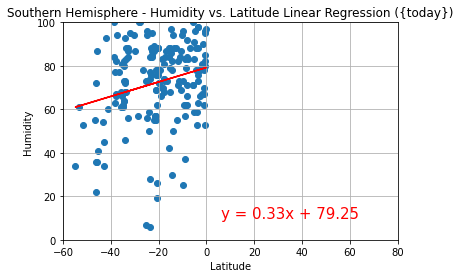

<Figure size 432x288 with 0 Axes>

In [22]:
#set x values to south latitudes
x_values = pd.to_numeric(WeatherDataSouth_df['Latitude']).astype(float)

#set y values to maximum temperatures
y_values = pd.to_numeric(WeatherDataSouth_df['Humidity']).astype(float)

#set up linear regression model function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
LinValues = x_values * slope + intercept
LinEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {LinEquation}")
print(f"The r-squared is: {rvalue}")
print("The regression does not display any correlation between humidity and latitude.")

#create scatter plot with above data
plt.scatter(x_values,y_values)
plt.plot(x_values,LinValues,"r-")
plt.annotate(LinEquation,(6,10),fontsize=15,color="red")

#label axis and insert Title
today = time.strftime("%m/%d/%Y")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression ({today})')

#format plot
plt.grid()
plt.ylim(0,100)
plt.xlim(-60, 80)


#display plot and save to png
plt.show()
plt.savefig("Southern Hemisphere vs Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.69x + 23.89
The r-squared is: 0.3409641535264268
The regression does not display any correlation between cloudiness and latitude.


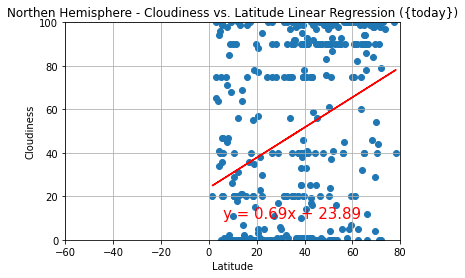

<Figure size 432x288 with 0 Axes>

In [23]:
#set x values to south latitudes
x_values = pd.to_numeric(WeatherDataNorth_df['Latitude']).astype(float)

#set y values to maximum temperatures
y_values = pd.to_numeric(WeatherDataNorth_df['Cloudiness']).astype(float)

#set up linear regression model function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
LinValues = x_values * slope + intercept
LinEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {LinEquation}")
print(f"The r-squared is: {rvalue}")
print("The regression does not display any correlation between cloudiness and latitude.")

#create scatter plot with above data
plt.scatter(x_values,y_values)
plt.plot(x_values,LinValues,"r-")
plt.annotate(LinEquation,(6,10),fontsize=15,color="red")

#label axis and insert Title
today = time.strftime("%m/%d/%Y")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northen Hemisphere - Cloudiness vs. Latitude Linear Regression ({today})')

#format plot
plt.grid()
plt.ylim(0,100)
plt.xlim(-60, 80)


#display plot and save to png
plt.show()
plt.savefig("Northern Hemisphere vs Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.58x + 58.18
The r-squared is: 0.20188243420009092
The regression does not display any correlation between humidity and latitude.


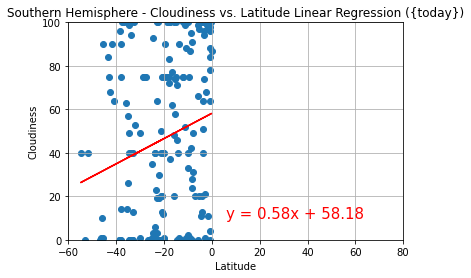

<Figure size 432x288 with 0 Axes>

In [24]:
#set x values to south latitudes
x_values = pd.to_numeric(WeatherDataSouth_df['Latitude']).astype(float)

#set y values to maximum temperatures
y_values = pd.to_numeric(WeatherDataSouth_df['Cloudiness']).astype(float)

#set up linear regression model function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
LinValues = x_values * slope + intercept
LinEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {LinEquation}")
print(f"The r-squared is: {rvalue}")
print("The regression does not display any correlation between humidity and latitude.")

#create scatter plot with above data
plt.scatter(x_values,y_values)
plt.plot(x_values,LinValues,"r-")
plt.annotate(LinEquation,(6,10),fontsize=15,color="red")

#label axis and insert Title
today = time.strftime("%m/%d/%Y")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression ({today})')

#format plot
plt.grid()
plt.ylim(0,100)
plt.xlim(-60, 80)


#display plot and save to png
plt.show()
plt.savefig("Southern Hemisphere vs Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.03x + 6.26
The r-squared is: 0.10511652677584747
The regression does not display any correlation between wind speed and latitude.


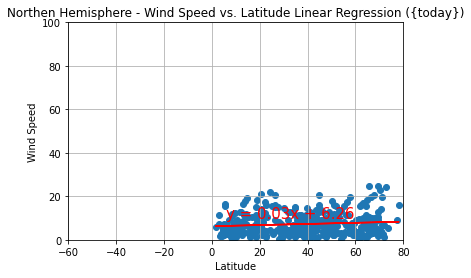

<Figure size 432x288 with 0 Axes>

In [25]:
#set x values to south latitudes
x_values = pd.to_numeric(WeatherDataNorth_df['Latitude']).astype(float)

#set y values to maximum temperatures
y_values = pd.to_numeric(WeatherDataNorth_df['Wind Speed']).astype(float)

#set up linear regression model function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
LinValues = x_values * slope + intercept
LinEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {LinEquation}")
print(f"The r-squared is: {rvalue}")
print("The regression does not display any correlation between wind speed and latitude.")

#create scatter plot with above data
plt.scatter(x_values,y_values)
plt.plot(x_values,LinValues,"r-")
plt.annotate(LinEquation,(6,10),fontsize=15,color="red")

#label axis and insert Title
today = time.strftime("%m/%d/%Y")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northen Hemisphere - Wind Speed vs. Latitude Linear Regression ({today})')

#format plot
plt.grid()
plt.ylim(0,100)
plt.xlim(-60, 80)


#display plot and save to png
plt.show()
plt.savefig("Northern Hemisphere vs Wind Speed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.1x + 5.26
The r-squared is: -0.2895320287464859
The regression does not display any correlation between wind speed and latitude.


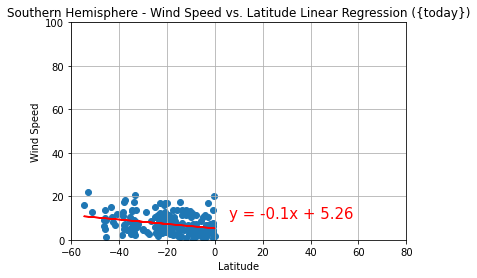

<Figure size 432x288 with 0 Axes>

In [26]:
#set x values to south latitudes
x_values = pd.to_numeric(WeatherDataSouth_df['Latitude']).astype(float)

#set y values to maximum temperatures
y_values = pd.to_numeric(WeatherDataSouth_df['Wind Speed']).astype(float)

#set up linear regression model function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
LinValues = x_values * slope + intercept
LinEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {LinEquation}")
print(f"The r-squared is: {rvalue}")
print("The regression does not display any correlation between wind speed and latitude.")

#create scatter plot with above data
plt.scatter(x_values,y_values)
plt.plot(x_values,LinValues,"r-")
plt.annotate(LinEquation,(6,10),fontsize=15,color="red")

#label axis and insert Title
today = time.strftime("%m/%d/%Y")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression ({today})')

#format plot
plt.grid()
plt.ylim(0,100)
plt.xlim(-60, 80)


#display plot and save to png
plt.show()
plt.savefig("Southern Hemisphere vs Wind Speed.png")